# Chapter 3 Applied Labs

## Q9 (Multiple linear regression on the `Auto` dataset)

### (a) Produce a scatterplot matrix which includes all the variables in the dataset

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.stats.anova
import numpy as np

%matplotlib inline

sns.set(style="whitegrid")

In [2]:
auto = sm.datasets.get_rdataset("Auto", "ISLR").data
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


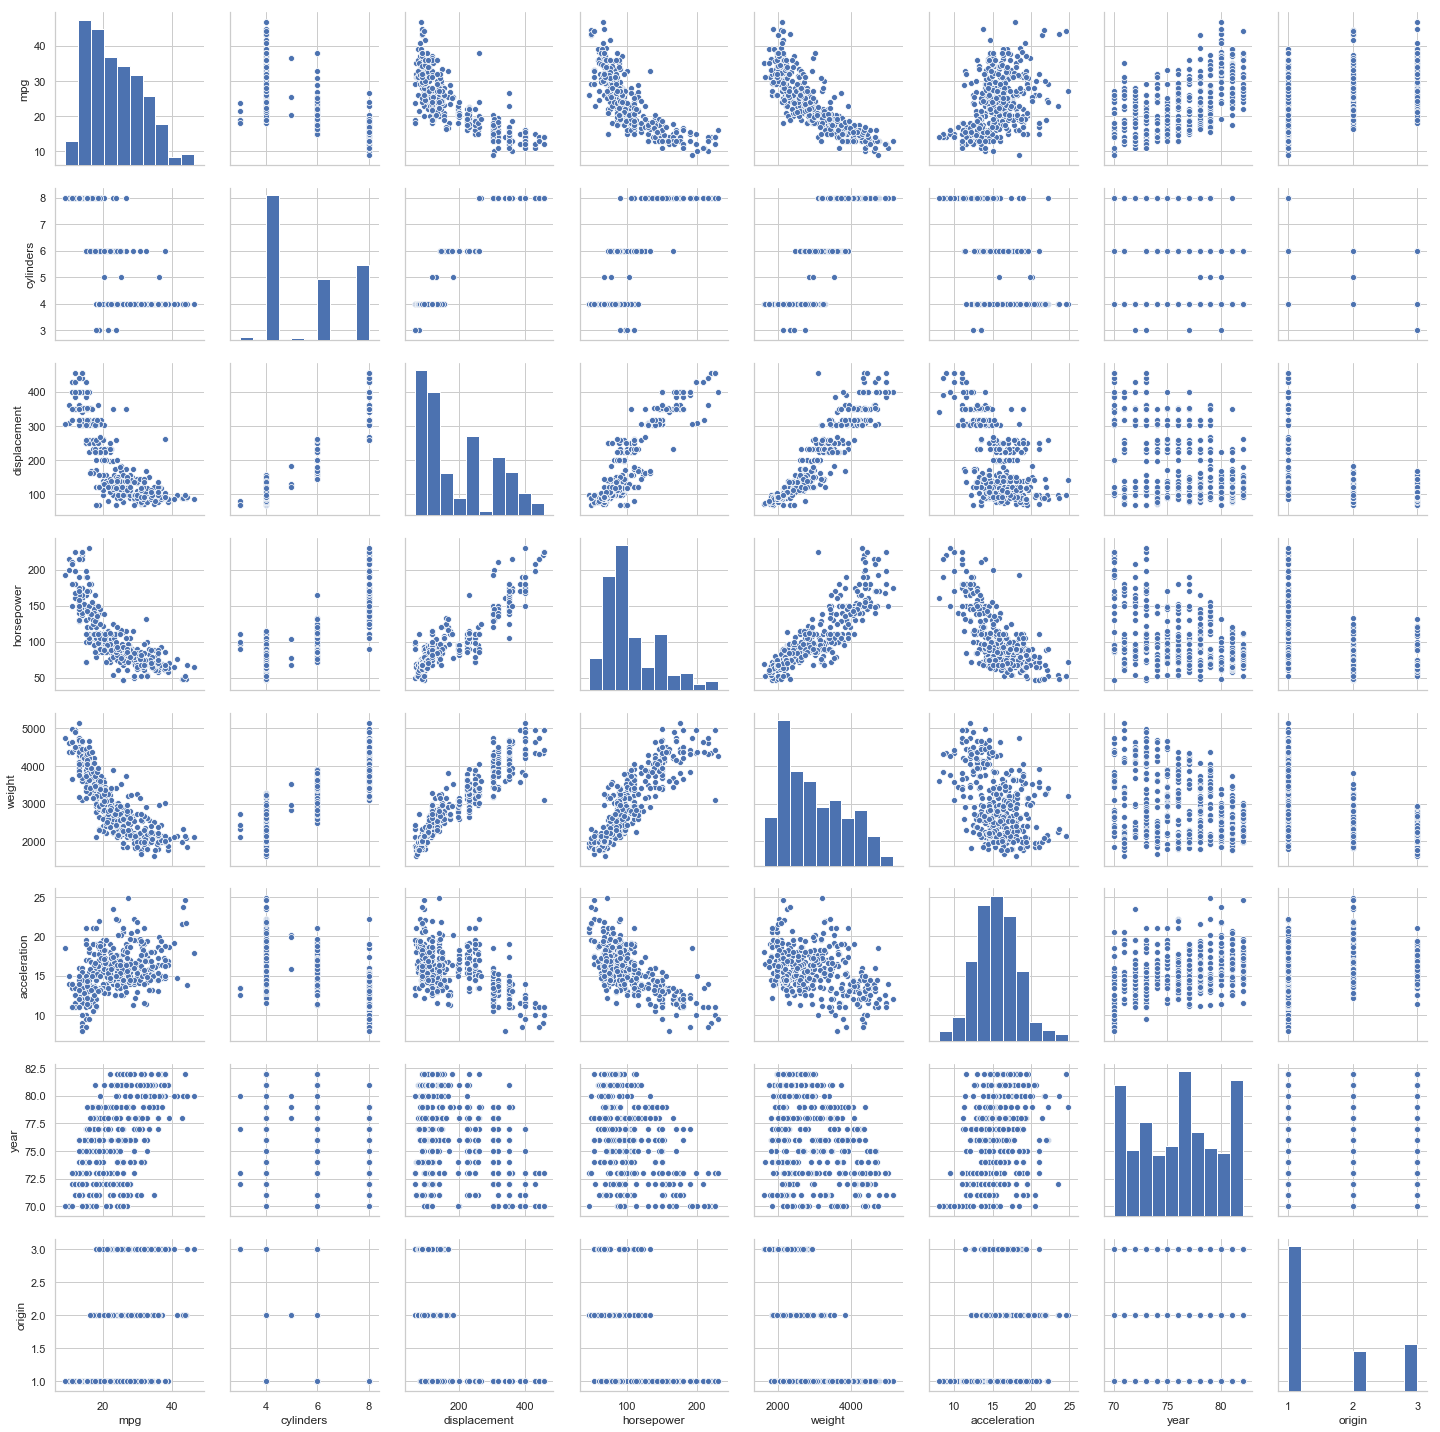

In [3]:
sns.pairplot(auto)

### (b) Compute the matrix of correlations between the variables

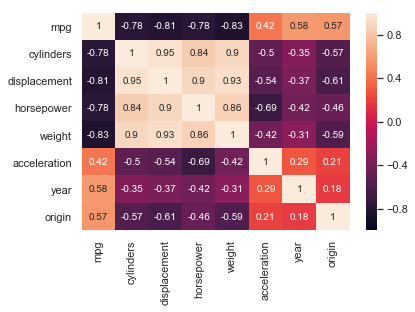

In [4]:
corr = auto.corr() # [auto.columns[:-2]].corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=+1, annot=True)

### (c) Perform a multiple linear regression with mpg and all the variables except name as the predictors.

In [5]:
# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train =  sm.add_constant(auto)

# statsmodels doesn't have the "." syntax for all columns
predictors = "+".join(auto.columns.drop(["name", "mpg"]))
model = smf.ols(f"mpg ~{predictors}", data=auto)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 16 May 2019   Prob (F-statistic):          2.04e-139
Time:                        17:21:14   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

/home/will/.local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Comment on the output.
I) Is there a relationship between the predictors and the response?

Yes - this is proved by the p-value of the F-statistic. The linear fit explains 82.1% of the variance in the data.

II) Which predictors appears to have a significant relationship to the response?

The `weight` is significant, as are the `year` and `origin`


III) What does the coefficient for the `year` variable suggest?

The coefficient is positive, implying that there is a positive relationship. Specifically, that if everything else is held constant, a car that is one year newer has ~0.75 greater mpg.

### (d) Produce diagnostic plots

Text(0, 0.5, 'residuals')

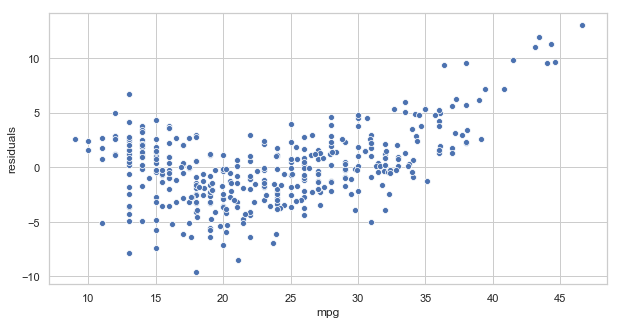

In [6]:
fig = plt.figure(figsize=(10,5))
# fig = sm.graphics.plot_regress_exog(results, "horsepower", fig=fig)
g = sns.scatterplot(auto.mpg, results.resid)
g.set_ylabel("residuals")

There is some evidence of non-linearity here. The high-mpg points have the largest residuals.

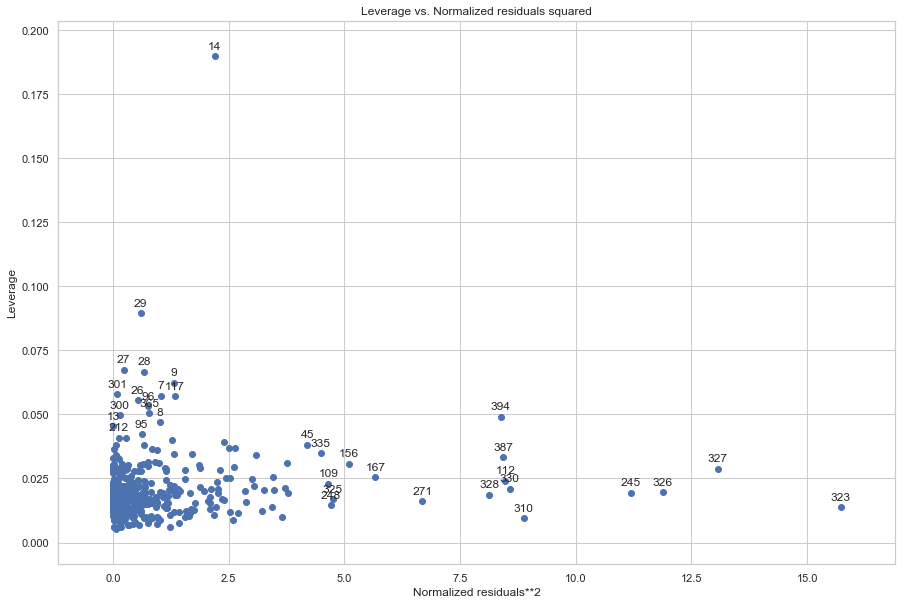

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

Observation 14 has unusually high leverage, but doesn't have a high residual so is unlikely to be an outlier.

### (e) Use * and : to fit linear regression models with interaction effects. Are any interactions significant?



In [8]:
print(predictors)

cylinders+displacement+horsepower+weight+acceleration+year+origin


In [9]:
X_train =  sm.add_constant(auto)

# statsmodels doesn't have the "." syntax for all columns
for pred1 in auto.columns.drop(["name", "mpg"]):
    for pred2 in auto.columns.drop(["name", "mpg", pred1]):
        predictors = "+".join(auto.columns.drop(["name", "mpg"]))
        model = smf.ols(f"mpg ~{predictors}+{pred1}:{pred2}", data=auto)
        results = model.fit()
        print(f"{pred1}:{pred2}")
        print(results.summary())

cylinders:displacement
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 16 May 2019   Prob (F-statistic):          9.73e-151
Time:                        17:21:15   Log-Likelihood:                -993.83
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     383   BIC:                             2041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Inter

displacement:horsepower
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.1
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.59e-160
Time:                        17:21:15   Log-Likelihood:                -970.71
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1995.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
In

horsepower:weight
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.88e-159
Time:                        17:21:15   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           

weight:horsepower
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.88e-159
Time:                        17:21:15   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           

acceleration:weight
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.9
Date:                Thu, 16 May 2019   Prob (F-statistic):          5.46e-148
Time:                        17:21:15   Log-Likelihood:                -1000.3
No. Observations:                 392   AIC:                             2019.
Df Residuals:                     383   BIC:                             2054.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     265.1
Date:                Thu, 16 May 2019   Prob (F-statistic):          5.11e-151
Time:                        17:21:16   Log-Likelihood:                -993.17
No. Observations:                 392   AIC:                             2004.
Df Residuals:                     383   BIC:                             2040.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -118.5635     13.376     -8.864   

origin:acceleration
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     252.2
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.57e-147
Time:                        17:21:16   Log-Likelihood:                -1001.4
No. Observations:                 392   AIC:                             2021.
Df Residuals:                     383   BIC:                             2057.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

There are lots of statistically significant interactions here. (suspiciously many?) 

In [10]:
# Plot a multiple linear regression with and without all the interaction terms
predictors = "+".join(auto.columns.drop(["name", "mpg"]))
non_interacting_model = smf.ols(f"mpg ~{predictors}", data=auto)
non_interacting_results = non_interacting_model.fit()
print(non_interacting_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 16 May 2019   Prob (F-statistic):          2.04e-139
Time:                        17:21:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [11]:
# Drop insignificant terms
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))
non_interacting_model = smf.ols(f"mpg ~{predictors}", data=auto)
non_interacting_results = non_interacting_model.fit()
print(non_interacting_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 16 May 2019   Prob (F-statistic):          7.26e-143
Time:                        17:21:16   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0459      4.001     -4.510      0.0

When we include all the individually-significant terms, some become unsignificant - perform backward selection by removing unsignificant terms

In [12]:
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))


interactions = "+".join(["weight:year", "weight:origin"])

interacting_model = smf.ols(f"mpg ~{predictors} + {interactions}", data=auto)
interacting_results = interacting_model.fit()
print(interacting_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     416.7
Date:                Thu, 16 May 2019   Prob (F-statistic):          4.36e-153
Time:                        17:21:16   Log-Likelihood:                -997.43
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     386   BIC:                             2031.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -103.5066     12.680     -8.163

The weight:year and weight:origin interactions appear significant when using this reduced set of predictors. We can test this with ANOVA

In [13]:
statsmodels.stats.anova.anova_lm(non_interacting_results,interacting_results)

/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,388.0,4348.105235,0.0,NaN,NaN,NaN
1,386.0,3723.195814,2.0,624.90942,32.393547,9.882240e-14


### (f) Try some transformations of the data, such as log(X), sqrt(X), X^2, and comment

In [14]:
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))

non_linear_model = smf.ols(f"mpg ~{predictors} + np.log(weight) + np.log(year)", data=auto)
non_linear_results = non_linear_model.fit()
print(non_linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     481.2
Date:                Thu, 16 May 2019   Prob (F-statistic):          2.31e-163
Time:                        17:21:16   Log-Likelihood:                -973.37
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     386   BIC:                             1983.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2815.0172    460.805      6.

In [15]:
statsmodels.stats.anova.anova_lm(non_interacting_results,non_linear_results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,388.0,4348.105235,0.0,NaN,NaN,NaN
1,386.0,3293.078183,2.0,1055.027051,61.832793,5.073236e-24


In [16]:
# We can indeed reduce the error by using non-linear transforms!

In [17]:
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))

non_linear_model2 = smf.ols(f"mpg ~{predictors} +  np.square(year)", data=auto)
non_linear_results2 = non_linear_model2.fit()
print(non_linear_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     469.6
Date:                Thu, 16 May 2019   Prob (F-statistic):          5.20e-147
Time:                        17:21:17   Log-Likelihood:                -1014.9
No. Observations:                 392   AIC:                             2040.
Df Residuals:                     387   BIC:                             2060.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         376.9770     76.814     

In [18]:
statsmodels.stats.anova.anova_lm(non_interacting_results,non_linear_results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,388.0,4348.105235,0.0,NaN,NaN,NaN
1,387.0,4069.315621,1.0,278.789614,26.513446,4.174877e-07


In [19]:
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))

non_linear_model3 = smf.ols(f"mpg ~{predictors} +  np.sqrt(year) + np.sqrt(origin) + np.sqrt(weight) ", data=auto)
non_linear_results3 = non_linear_model3.fit()
print(non_linear_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     410.8
Date:                Thu, 16 May 2019   Prob (F-statistic):          6.39e-164
Time:                        17:21:17   Log-Likelihood:                -968.86
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     385   BIC:                             1980.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1637.4301    274.853     

In [20]:
statsmodels.stats.anova.anova_lm(non_interacting_results,non_linear_results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,388.0,4348.105235,0.0,NaN,NaN,NaN
1,385.0,3218.144725,3.0,1129.96051,45.060621,5.589484e-25


In [21]:
statsmodels.stats.anova.anova_lm(non_linear_results2,non_linear_results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,387.0,4069.315621,0.0,NaN,NaN,NaN
1,385.0,3218.144725,2.0,851.170896,50.914552,2.405513e-20


In [22]:
predictors = "+".join(auto.columns.drop(["name", "mpg", "acceleration", "horsepower", "cylinders", "displacement"]))

non_linear_model4 = smf.ols(f"mpg ~{predictors} +  np.sqrt(year) + np.sqrt(origin) + np.sqrt(weight) \
                                                +  np.square(year)", data=auto)
non_linear_results4 = non_linear_model4.fit()
print(non_linear_results4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     361.0
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.37e-164
Time:                        17:21:17   Log-Likelihood:                -964.17
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     384   BIC:                             1976.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         3.06e+04   9497.489     

In [23]:
statsmodels.stats.anova.anova_lm(non_linear_results3,non_linear_results4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,385.0,3218.144725,0.0,NaN,NaN,NaN
1,384.0,3141.993494,1.0,76.151231,9.306853,0.002442


In [24]:
# ANOVA tests suggests that including sqrt terms causes the most improvement in the model accuracy.